<a href="https://colab.research.google.com/github/Zfeng0207/FIT3199-FYP/blob/dev%2Fzfeng/01_ingestion_and_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Ingestion and Exploratory Data Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Ingestion

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder


In [26]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/00_sampled_data.csv')

## Data Profiling

In [27]:
df.head()

,subject_id,stay_id_x,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,...,seq_num,icd_code,icd_version,icd_title,Stroke_Y/N,gender,anchor_age,anchor_year,anchor_year_group,dod
0,14394983,34259230.0,2202-07-10 12:24:00,98.3,74.0,19.0,97.0,153.0,67.0,NaN,...,2,F1910,10,"Other psychoactive substance abuse, uncomplicated",0,M,46,2196,2008 - 2010,NaN
1,17730806,30258441.0,2182-07-17 16:58:00,NaN,82.0,16.0,96.0,115.0,102.0,NaN,...,1,431,9,INTRACEREBRAL HEMORRHAGE,1,M,68,2176,2011 - 2013,NaN
2,15973805,30481231.0,2145-07-03 17:20:00,98.0,109.0,18.0,98.0,113.0,77.0,NaN,...,2,V6284,9,SUICIDAL IDEATION,0,F,51,2139,2011 - 2013,NaN
3,16945691,36369419.0,2117-12-18 23:50:00,99.9,74.0,16.0,100.0,151.0,76.0,NaN,...,1,R197,10,"Diarrhea, unspecified",0,F,81,2111,2011 - 2013,2118-09-20
4,15632719,33618002.0,2170-04-19 20:58:00,98.4,83.0,NaN,94.0,142.0,81.0,NaN,...,1,431,9,INTRACEREBRAL HEMORRHAGE,1,M,55,2170,2014 - 2016,2170-10-06


##### Insights
**Observations**


**Key Takeaway**


## Data Quality Check

Check for null values

In [28]:
df.isnull().sum()

,0
subject_id,0
stay_id_x,116
charttime,116
temperature,20667
heartrate,2296
resprate,2934
o2sat,4759
sbp,2548
dbp,2548
rhythm,49745


note: category has 257 null values

In [29]:
df.duplicated().sum()

0

note: no duplicated rows

##### Insights
**Observations**

**Key Takeaway**


## Exploratory Data Analysis

### Overview of the merged dataset

In [30]:
df.describe()

,subject_id,stay_id_x,temperature,heartrate,resprate,o2sat,sbp,dbp,stay_id_y,seq_num,icd_version,Stroke_Y/N,anchor_age,anchor_year
count,5.229000e+04,5.217400e+04,31623.000000,49994.000000,49356.000000,47531.000000,49742.000000,49742.000000,5.229000e+04,52290.000000,52290.000000,52290.000000,52290.000000,52290.000000
mean,1.497514e+07,3.501343e+07,98.047064,80.517452,17.814805,97.903309,129.293072,73.612983,3.486627e+07,2.209887,9.395907,0.420922,55.874412,2154.480761
std,2.917705e+06,2.864093e+06,2.988541,17.057102,8.670738,4.971311,23.540406,71.753491,2.772354e+06,1.455370,0.489049,0.493712,17.697853,23.826064
min,1.000076e+07,3.000057e+07,6.900000,0.000000,0.000000,0.000000,10.000000,4.000000,3.000532e+07,1.000000,9.000000,0.000000,18.000000,2110.000000
25%,1.229846e+07,3.258364e+07,97.800000,69.000000,16.000000,97.000000,113.000000,62.000000,3.248480e+07,1.000000,9.000000,0.000000,44.000000,2135.000000
50%,1.499856e+07,3.502928e+07,98.100000,79.000000,18.000000,98.000000,127.000000,72.000000,3.485034e+07,2.000000,9.000000,0.000000,56.000000,2154.000000
75%,1.749770e+07,3.749973e+07,98.400000,90.000000,18.000000,100.000000,143.000000,83.000000,3.702457e+07,3.000000,10.000000,1.000000,68.000000,2174.000000
max,1.999999e+07,3.999726e+07,110.300000,219.000000,1796.500000,1000.000000,269.000000,9101.000000,3.999726e+07,9.000000,10.000000,1.000000,91.000000,2205.000000


In [33]:
print(df.dtypes)

subject_id             int64
stay_id_x            float64
charttime             object
temperature          float64
heartrate            float64
resprate             float64
o2sat                float64
sbp                  float64
dbp                  float64
rhythm                object
pain                  object
stay_id_y              int64
seq_num                int64
icd_code              object
icd_version            int64
icd_title             object
Stroke_Y/N             int64
gender                object
anchor_age             int64
anchor_year            int64
anchor_year_group     object
dod                   object
dtype: object


In [34]:
# Convert datetime columns
df['charttime'] = pd.to_datetime(df['charttime'])
df['dod'] = pd.to_datetime(df['dod'])

# Convert categorical columns to numerical representation
df['rhythm'] = df['rhythm'].astype('category').cat.codes
df['pain'] = df['pain'].astype('category').cat.codes
df['icd_code'] = df['icd_code'].astype('category').cat.codes
df['icd_title'] = df['icd_title'].astype('category').cat.codes
df['gender'] = df['gender'].astype('category').cat.codes
df['anchor_year_group'] = df['anchor_year_group'].astype('category').cat.codes

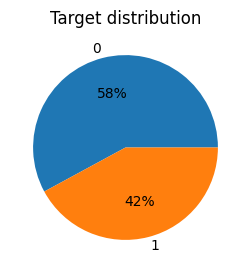

In [35]:
targets = df['Stroke_Y/N']

temp = targets.value_counts()
temp

plt.figure(figsize=(6, 3))
plt.pie(temp, labels=temp.index, autopct="%.0f%%")
plt.title('Target distribution')
plt.show()

array([[<Axes: title={'center': 'subject_id'}>,
        <Axes: title={'center': 'stay_id_x'}>,
        <Axes: title={'center': 'charttime'}>,
        <Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'heartrate'}>],
       [<Axes: title={'center': 'resprate'}>,
        <Axes: title={'center': 'o2sat'}>,
        <Axes: title={'center': 'sbp'}>, <Axes: title={'center': 'dbp'}>,
        <Axes: title={'center': 'rhythm'}>],
       [<Axes: title={'center': 'pain'}>,
        <Axes: title={'center': 'stay_id_y'}>,
        <Axes: title={'center': 'seq_num'}>,
        <Axes: title={'center': 'icd_code'}>,
        <Axes: title={'center': 'icd_version'}>],
       [<Axes: title={'center': 'icd_title'}>,
        <Axes: title={'center': 'Stroke_Y/N'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'anchor_age'}>,
        <Axes: title={'center': 'anchor_year'}>],
       [<Axes: title={'center': 'anchor_year_group'}>,
        <Axes: title={'center':

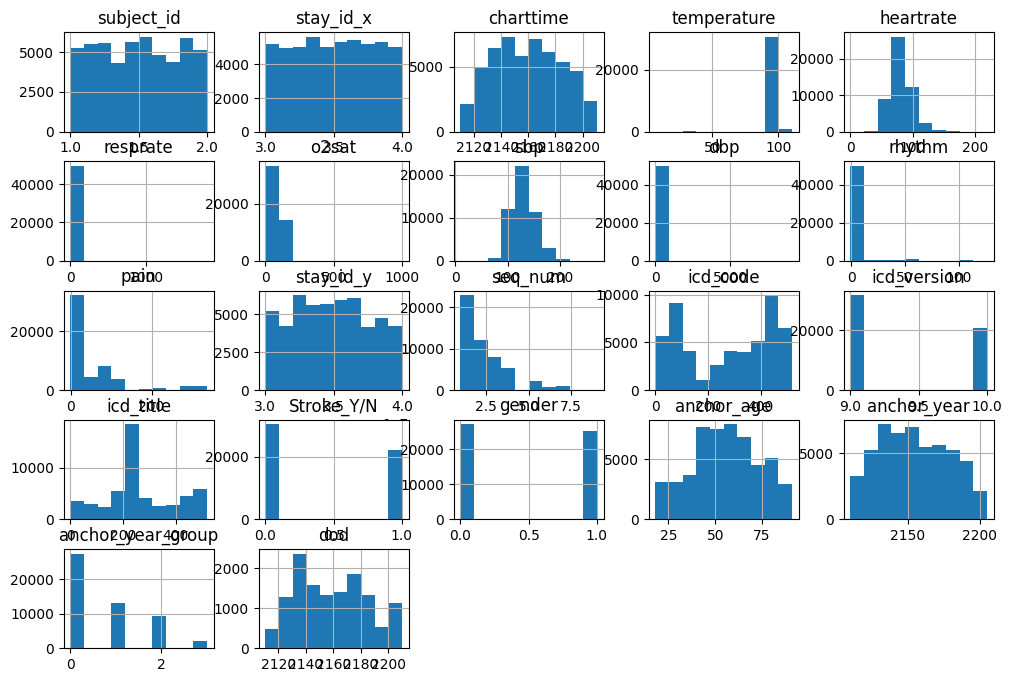

In [36]:
df.hist(figsize=(12, 8))

In [37]:
import seaborn as sns

corr_matrix = df.corr()
correlations = corr_matrix['Stroke_Y/N'].sort_values(ascending=False)
print(correlations)

Stroke_Y/N           1.000000
anchor_age           0.225157
icd_code             0.161009
subject_id           0.122512
dod                  0.074717
rhythm               0.055043
stay_id_y            0.052926
anchor_year_group    0.047620
icd_title            0.044488
pain                 0.035733
resprate             0.023825
gender               0.012736
seq_num              0.005546
stay_id_x            0.002087
sbp                 -0.004617
o2sat               -0.011641
dbp                 -0.015132
anchor_year         -0.016972
temperature         -0.017280
charttime           -0.053349
heartrate           -0.054480
icd_version         -0.205932
Name: Stroke_Y/N, dtype: float64


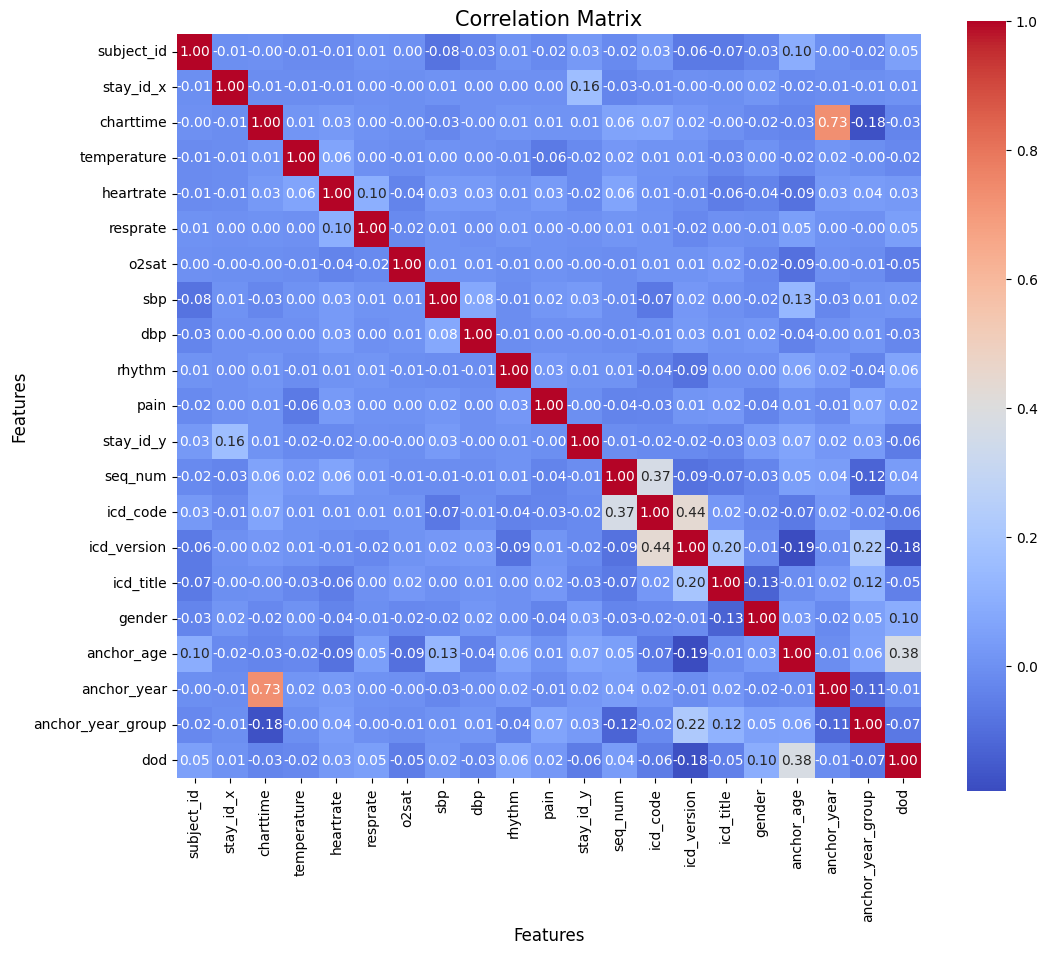

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

df_inputs = df.drop('Stroke_Y/N', axis=1)

# Compute the correlation matrix
corr_matrix = df_inputs.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Add titles and labels
plt.title('Correlation Matrix', size=15)
plt.xlabel('Features', size=12)
plt.ylabel('Features', size=12)

# Display the plot
plt.show()


<ipython-input-39-27578e74abff>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')


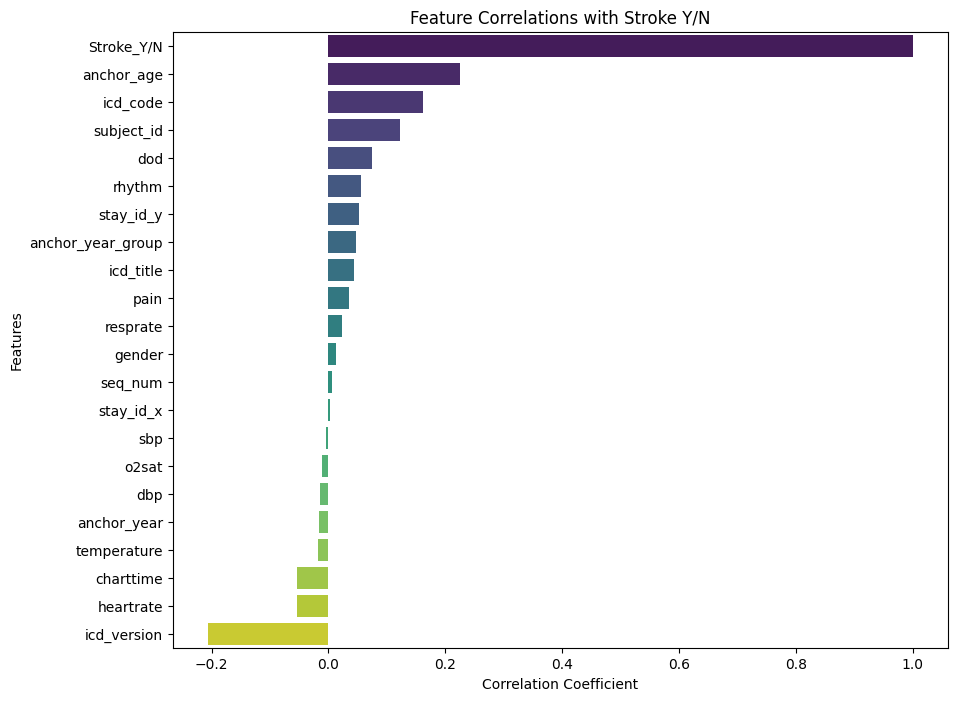

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

correlations = corr_matrix['Stroke_Y/N'].sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')

# Add titles and labels
plt.title('Feature Correlations with Stroke Y/N')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Display the plot
plt.show()


In [42]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/FIT3199-FYP/input/01_eda_output', index = False)